# camer sticker application

## (1) 필요한 모듈 import 하기

In [104]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import os


## (2) 이미지 불러오기
이미지의 크기를 작업을 위해 640x480으로 바꾸고 출력용 이미지를 img_bgr.copy에 별도로 보관합니다. 
opencv는 이미지 채널을 bgr 순서로 사용하기 때문에 색이 바뀌어 출력됩니다.

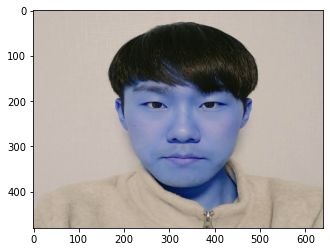

In [105]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640,480))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

따라서 bgr을 다시 rgb 순서로 바꾸어줍니다.

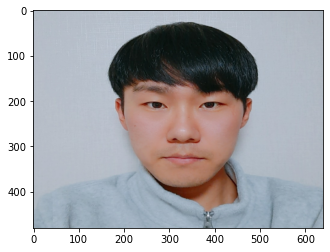

In [106]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## (3) 얼굴 검출하기
dlib의 face detector를 사용하여 얼굴을 검출하겠습니다. 불러온 dlib을 활용하여 hog detector를 선언하고 detector를 이용해서 bounding box를 추출합니다. 

rectangles[[(200, 112) (468, 379)]]


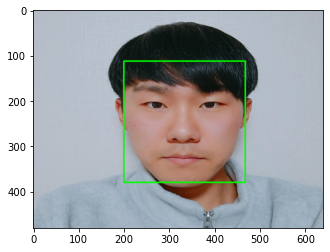

In [107]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
img_rgd = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb,1)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


## (4) 얼굴 랜드마크
dlib에서 제공하는 모델을 weight file로 다운로드 후 위에서 찾은 얼굴 사진에 적용시켜 68개의 랜드마크를 찾습니다.

In [108]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


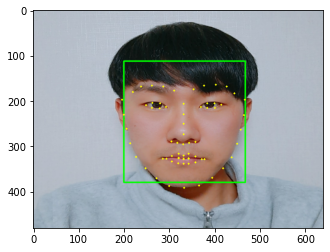

In [109]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## (5) 스티커 붙이기


In [93]:
x1 = (landmark[2][0] + landmark[30][0])/2
y1 = (landmark[2][1] + landmark[36][1])/2
print("({0},{1})".format(x1,y1)) #시작점좌표

(269.0,235.0)


In [94]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = int((landmark[30][0] - x1) * 2)
    h = int(dlib_rect.width() / 3)
    print ('(x,y) : (%d,%d)'%(x,y)) #스티커 위치
    print ('(w,h) : (%d,%d)'%(w,h)) #스티커 크기

(332, 273)
(x,y) : (332,273)
(w,h) : (126,89)


(89, 126, 3)


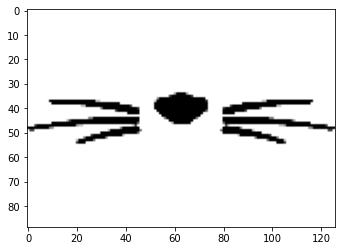

In [95]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

In [96]:
refined_x = int(x1)
refined_y = int(y1)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (269,235)


In [97]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print(sticker_area.shape)

(89, 126, 3)


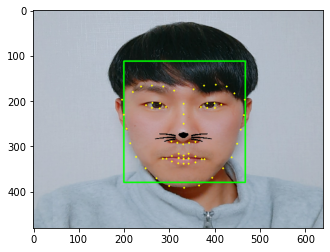

In [98]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

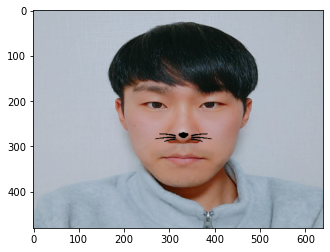

In [100]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()